# Taylor Swift Spotify Popularity Prediction with Explainable AI

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
import matplotlib.pyplot as plt
from scipy.stats import loguniform, randint
from sklearn.preprocessing import StandardScaler

import optuna
from optuna.samplers import TPESampler

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, DotProduct, Matern

TS = pd.read_csv("taylor_swift_spotify.csv")
display(TS)
TS.info()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,1,6dODwocEuGzHAavXqTbwHv,spotify:track:6dODwocEuGzHAavXqTbwHv,0.50200,0.504,0.386,0.000015,0.0961,-10.976,0.0308,192.004,0.281,92,228965
1,1,The Tortured Poets Department,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,2,4PdLaGZubp4lghChqp8erB,spotify:track:4PdLaGZubp4lghChqp8erB,0.04830,0.604,0.428,0.000000,0.1260,-8.441,0.0255,110.259,0.292,90,293048
2,2,My Boy Only Breaks His Favorite Toys,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,3,7uGYWMwRy24dm7RUDDhUlD,spotify:track:7uGYWMwRy24dm7RUDDhUlD,0.13700,0.596,0.563,0.000000,0.3020,-7.362,0.0269,97.073,0.481,90,203801
3,3,Down Bad,THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,4,1kbEbBdEgQdQeLXCJh28pJ,spotify:track:1kbEbBdEgQdQeLXCJh28pJ,0.56000,0.541,0.366,0.000001,0.0946,-10.412,0.0748,159.707,0.168,91,261228
4,4,"So Long, London",THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY,2024-04-19,5,7wAkQFShJ27V8362MqevQr,spotify:track:7wAkQFShJ27V8362MqevQr,0.73000,0.423,0.533,0.002640,0.0816,-11.388,0.3220,160.218,0.248,90,262974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,572,Our Song,Taylor Swift,2006-10-24,11,15DeqWWQB4dcEWzJg15VrN,spotify:track:15DeqWWQB4dcEWzJg15VrN,0.11100,0.668,0.672,0.000000,0.3290,-4.931,0.0303,89.011,0.539,72,201106
573,573,I'm Only Me When I'm With You,Taylor Swift,2006-10-24,12,0JIdBrXGSJXS72zjF9ss9u,spotify:track:0JIdBrXGSJXS72zjF9ss9u,0.00452,0.563,0.934,0.000807,0.1030,-3.629,0.0646,143.964,0.518,57,213053
574,574,Invisible,Taylor Swift,2006-10-24,13,5OOd01o2YS1QFwdpVLds3r,spotify:track:5OOd01o2YS1QFwdpVLds3r,0.63700,0.612,0.394,0.000000,0.1470,-5.723,0.0243,96.001,0.233,53,203226
575,575,A Perfectly Good Heart,Taylor Swift,2006-10-24,14,1spLfUJxtyVyiKKTegQ2r4,spotify:track:1spLfUJxtyVyiKKTegQ2r4,0.00349,0.483,0.751,0.000000,0.1280,-5.726,0.0365,156.092,0.268,52,220146


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        577 non-null    int64  
 1   name              577 non-null    object 
 2   album             577 non-null    object 
 3   release_date      577 non-null    object 
 4   track_number      577 non-null    int64  
 5   id                577 non-null    object 
 6   uri               577 non-null    object 
 7   acousticness      577 non-null    float64
 8   danceability      577 non-null    float64
 9   energy            577 non-null    float64
 10  instrumentalness  577 non-null    float64
 11  liveness          577 non-null    float64
 12  loudness          577 non-null    float64
 13  speechiness       577 non-null    float64
 14  tempo             577 non-null    float64
 15  valence           577 non-null    float64
 16  popularity        577 non-null    int64  
 1

## Count tracks per album

In [2]:
TS['album'].value_counts()

album
reputation Stadium Tour Surprise Song Playlist                                         46
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]    34
THE TORTURED POETS DEPARTMENT: THE ANTHOLOGY                                           31
Red (Taylor's Version)                                                                 30
Fearless (Taylor's Version)                                                            26
Midnights (The Til Dawn Edition)                                                       23
Speak Now (Taylor's Version)                                                           22
Red (Deluxe Edition)                                                                   22
1989 (Taylor's Version) [Deluxe]                                                       22
1989 (Taylor's Version)                                                                21
Midnights (3am Edition)                                                                20
Spea

## Visualize album characteristics as box plots

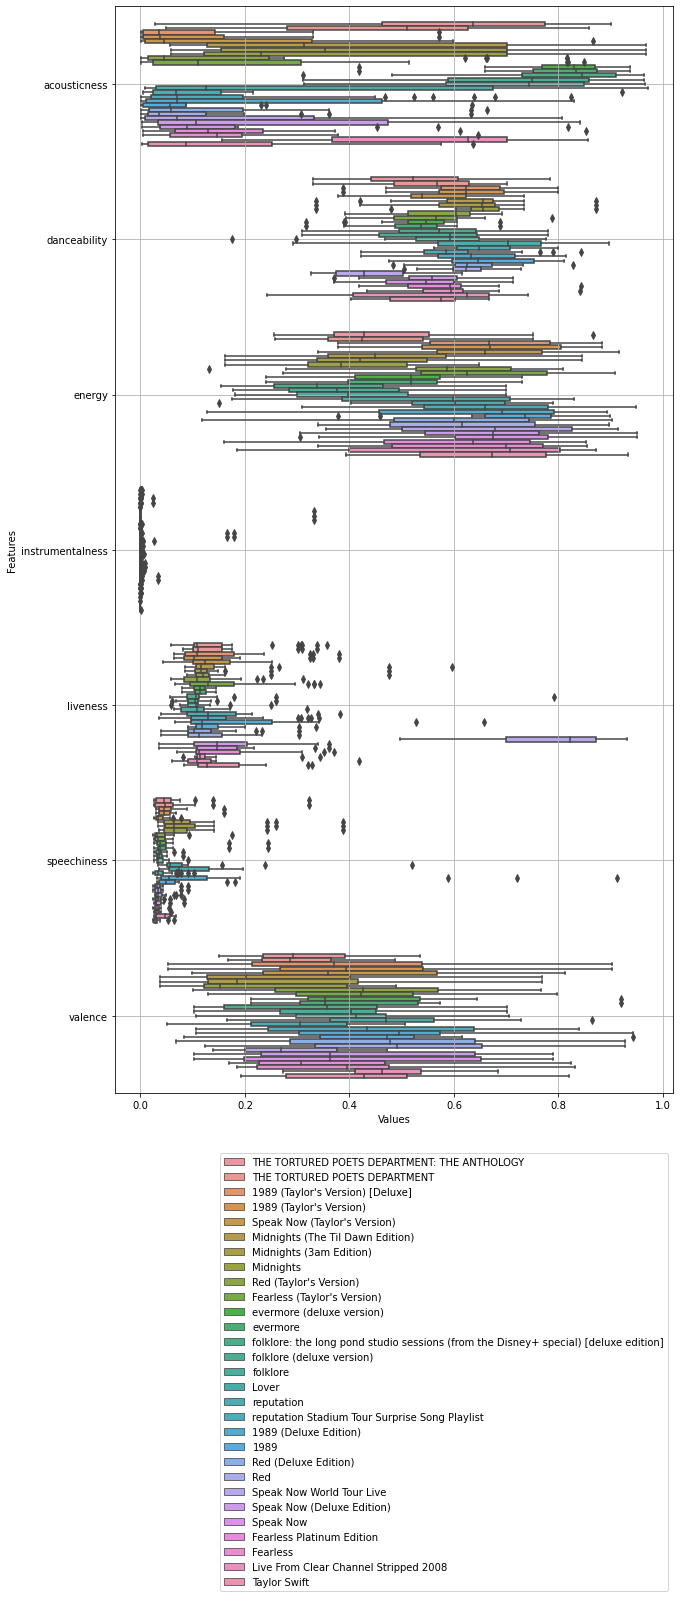

In [3]:
# Collect all features having [0, 1] as the range of values
melted_TS = pd.melt(TS, id_vars="album", value_vars=TS.columns.values[np.r_[7:12, 13, 15]])
melted_TS.columns = ['Album', 'Features', 'Values']

# Plot boxplots per album
plt.figure(figsize=(10,20))
sns.boxplot(data=melted_TS, width=0.8, orient="h",
            x="Values", y="Features", hue='Album')
plt.rc('axes', labelsize=15)
plt.legend(bbox_to_anchor=(1, -0.05))
plt.grid()
plt.show()

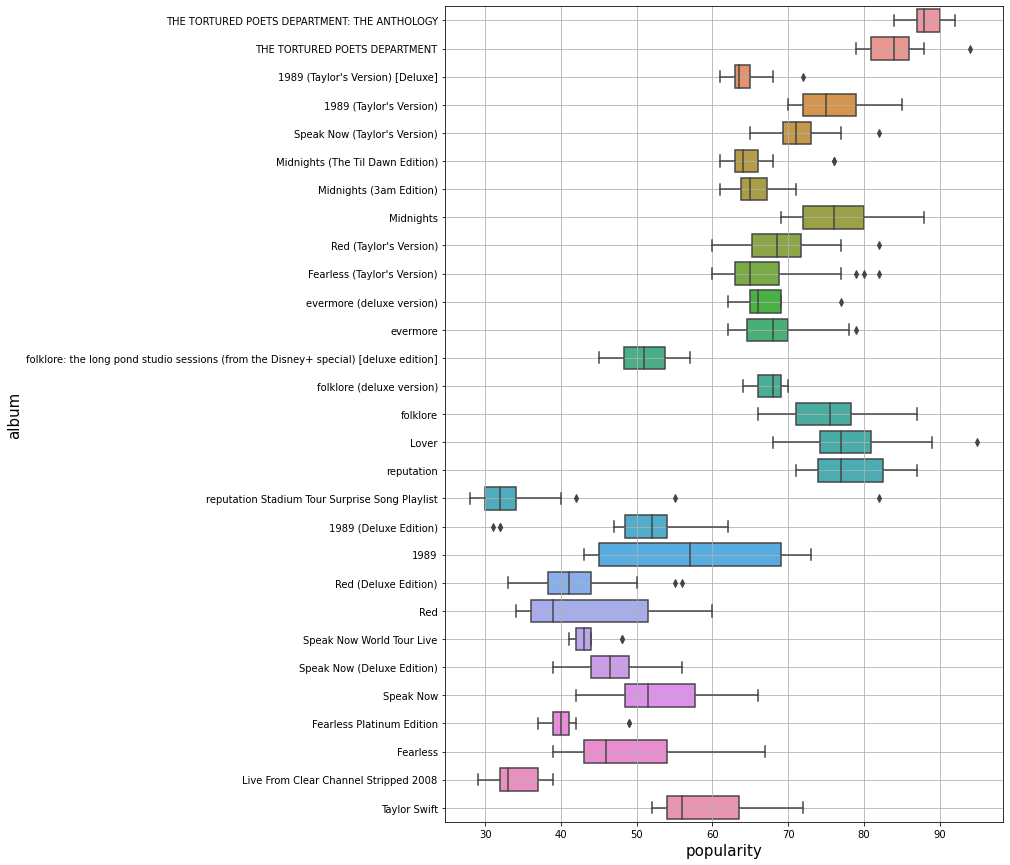

In [4]:
plt.figure(figsize=(10,15))
sns.boxplot(data=TS, x="popularity", y="album")
plt.grid()
plt.show()

## Split into Training and Test Data

In [5]:
x = TS.iloc[:,np.r_[7:12, 13, 15]].to_numpy()
y = TS.iloc[:,16].to_numpy()
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(x, y, np.arange(len(y)), 
                                                                         test_size=0.2, 
                                                                         stratify=TS['album'], 
                                                                         random_state=0)
y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)

# Only the y is scaled because all x are within [0, 1] already
scalerY = StandardScaler()
y_train_scaled = scalerY.fit_transform(y_train)
y_test_scaled = scalerY.transform(y_test)

# Optuna: Combined Model Selection and Hyper-parameter Tuning 

In [6]:
def create_model(trial):
    model_type = trial.suggest_categorical('model_type', ['KRR', 'kNN', 'SVR', 'MLP', 'RF', 'GBR', 'GPR'])
    
    if model_type == 'KRR':
        alpha = trial.suggest_float('KRR_alpha',0.01, 100, log=True)
        kernel = trial.suggest_categorical('KRR_kernel',
                                           ['rbf', 'polynomial', 'cosine', 'laplacian', 'sigmoid'])
        model = KernelRidge(alpha=alpha, kernel=kernel)
        
    if model_type == 'kNN':
        wts = trial.suggest_categorical('kNN_weights', ['uniform', 'distance'])
        n_neigh = trial.suggest_int('kNN_n_neighbors',1,20)
        model = KNeighborsRegressor(weights=wts,n_neighbors=n_neigh)
    
    if model_type == 'SVR':
        kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        C = trial.suggest_float('SVR-C', 0.1, 100, log=True)
        gamma = trial.suggest_float('SVR-gamma', 0.1, 100, log=True)
        epsi = trial.suggest_float('SVR-epsilon', 0.1, 100, log=True)
        degree = trial.suggest_int('SVR-degree', 1, 3, step=1)
        model = SVR(kernel=kernel, C=C, epsilon=epsi, gamma=gamma, degree=degree)
    
    if model_type == 'MLP':
        params = {
                    'learning_rate_init': trial.suggest_float('learning_rate_init ', 0.0001, 0.1, log=True),
                    'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive']),
                    'first_layer_neurons': trial.suggest_int('first_layer_neurons', 10, 100, step=1),
                    'second_layer_neurons': trial.suggest_int('second_layer_neurons', 10, 100, step=1),
                    'activation': trial.suggest_categorical('activation', ['identity', 'tanh', 'relu']),
                    'alpha': trial.suggest_float('alpha', 0.0001, 1, log=True)
                 }

        model = MLPRegressor(hidden_layer_sizes=(params['first_layer_neurons'], 
                                                 params['second_layer_neurons']),
                             learning_rate_init=params['learning_rate_init'],
                             learning_rate=params['learning_rate'],
                             activation=params['activation'],
                             alpha=params['alpha'],
                             max_iter=500,
                             random_state=42)
        
    if model_type == 'RF':
        n_estimators = trial.suggest_int('RF_n_estimators',10,200)
        max_depth = trial.suggest_int('RF_max_depth',1,50)
        min_samples_leaf = trial.suggest_int('RF_min_samples_leaf',1,10)
        min_samples_split = trial.suggest_int('RF_min_samples_split',2,10)
        crit = trial.suggest_categorical('RF_criterion', ['friedman_mse', 'squared_error', 'absolute_error'])
        model = RandomForestRegressor(n_estimators=n_estimators, 
                                      criterion=crit, 
                                      max_depth=max_depth,
                                      min_samples_leaf=min_samples_leaf,
                                      min_samples_split=min_samples_split,
                                      random_state=42)
        
    if model_type == 'GBR':
        n_estimators = trial.suggest_int('GBR_n_estimators',10,200)
        max_depth = trial.suggest_int('GBR_max_depth',1,50)
        min_samples_leaf = trial.suggest_int('GBR_min_samples_leaf',1,10)
        min_samples_split = trial.suggest_int('GBR_min_samples_split',2,10)
        learning_rate = trial.suggest_float('GBR_learning_rate', 0.01, 0.1, log=True)
        model = GradientBoostingRegressor(n_estimators=n_estimators, 
                                          max_depth=max_depth,
                                          learning_rate=learning_rate,
                                          min_samples_leaf=min_samples_leaf,
                                          min_samples_split=min_samples_split)
        
    if model_type == 'GPR':
        alpha = trial.suggest_float('GPR_alpha',0.01, 100, log=True)
        noise_level = trial.suggest_float('GPR_noise',0.01, 10, log=True)
        kernel_type = trial.suggest_categorical('GPR_kernel', ['rbf','matern','dot'])
        if kernel_type == 'rbf':
            length_scale = trial.suggest_float('GPR_length_scale',0.01, 10, log=True)
            model = GaussianProcessRegressor(kernel=WhiteKernel(noise_level) + RBF(length_scale=length_scale),
                                             alpha=alpha,
                                             normalize_y=False, 
                                             n_restarts_optimizer=10)
        if kernel_type == 'matern':
            length_scale = trial.suggest_float('GPR_length_scale',0.01, 10, log=True)
            nu = trial.suggest_float('GP_nu',0.5, 5, step=0.5)
            model = GaussianProcessRegressor(kernel=WhiteKernel(noise_level) + Matern(length_scale=length_scale,nu=nu),
                                             alpha=alpha,
                                             normalize_y=False, 
                                             n_restarts_optimizer=10)
        if kernel_type == 'dot':
            sigma = trial.suggest_float('GPR_dot_sigma', 0, 10)
            model = GaussianProcessRegressor(kernel=WhiteKernel(noise_level) + DotProduct(sigma_0=sigma),
                                             alpha=alpha,
                                             normalize_y=False, 
                                             n_restarts_optimizer=10)

    if trial.should_prune():
            raise optuna.TrialPruned()

    return model

def objective(trial):
    model = create_model(trial)
    scores = cross_val_score(model, X_train, y_train_scaled.ravel(), 
                             cv=5, scoring='neg_mean_squared_error')
    return np.mean(scores)

sampler = TPESampler(seed=42)
study = optuna.create_study(direction='maximize', 
                            sampler=sampler)
optuna_start = time()
study.optimize(lambda trial: objective(trial), n_trials=100)
best_params = study.best_params
print("\n\nBest parameters: ", best_params)
total_time = time()-optuna_start
print("Runtime: %.4f sec" % total_time)
best_mdl = create_model(study.best_trial)

[I 2024-05-16 23:32:35,271] A new study created in memory with name: no-name-9301e65b-f029-40b7-bce4-708069ccf03f
[I 2024-05-16 23:32:35,288] Trial 0 finished with value: -0.9448659259609012 and parameters: {'model_type': 'kNN', 'kNN_weights': 'uniform', 'kNN_n_neighbors': 15}. Best is trial 0 with value: -0.9448659259609012.
[I 2024-05-16 23:32:35,298] Trial 1 finished with value: -1.0426600661178536 and parameters: {'model_type': 'kNN', 'kNN_weights': 'uniform', 'kNN_n_neighbors': 6}. Best is trial 0 with value: -0.9448659259609012.
[I 2024-05-16 23:32:38,919] Trial 2 finished with value: -0.8234678388604877 and parameters: {'model_type': 'GBR', 'GBR_n_estimators': 108, 'GBR_max_depth': 30, 'GBR_min_samples_leaf': 1, 'GBR_min_samples_split': 7, 'GBR_learning_rate': 0.014808945119975192}. Best is trial 2 with value: -0.8234678388604877.
[I 2024-05-16 23:32:38,943] Trial 3 finished with value: -0.9991115596881153 and parameters: {'model_type': 'SVR', 'kernel': 'rbf', 'SVR-C': 53.451661

[I 2024-05-16 23:33:44,356] Trial 18 finished with value: -0.9814146787825972 and parameters: {'model_type': 'KRR', 'KRR_alpha': 44.13999624566037, 'KRR_kernel': 'polynomial'}. Best is trial 13 with value: -0.7738185104215679.
[I 2024-05-16 23:33:53,251] Trial 19 finished with value: -0.7835518421170329 and parameters: {'model_type': 'RF', 'RF_n_estimators': 181, 'RF_max_depth': 39, 'RF_min_samples_leaf': 5, 'RF_min_samples_split': 7, 'RF_criterion': 'absolute_error'}. Best is trial 13 with value: -0.7738185104215679.
[I 2024-05-16 23:34:00,765] Trial 20 finished with value: -0.7696171628527253 and parameters: {'model_type': 'RF', 'RF_n_estimators': 136, 'RF_max_depth': 34, 'RF_min_samples_leaf': 3, 'RF_min_samples_split': 5, 'RF_criterion': 'absolute_error'}. Best is trial 20 with value: -0.7696171628527253.
[I 2024-05-16 23:34:08,909] Trial 21 finished with value: -0.7696703130687651 and parameters: {'model_type': 'RF', 'RF_n_estimators': 144, 'RF_max_depth': 35, 'RF_min_samples_leaf

[I 2024-05-16 23:36:22,151] Trial 42 finished with value: -0.7479189746258927 and parameters: {'model_type': 'RF', 'RF_n_estimators': 115, 'RF_max_depth': 31, 'RF_min_samples_leaf': 1, 'RF_min_samples_split': 4, 'RF_criterion': 'absolute_error'}. Best is trial 25 with value: -0.7424117775740603.
[I 2024-05-16 23:36:27,181] Trial 43 finished with value: -0.7441971255814724 and parameters: {'model_type': 'RF', 'RF_n_estimators': 77, 'RF_max_depth': 26, 'RF_min_samples_leaf': 2, 'RF_min_samples_split': 3, 'RF_criterion': 'absolute_error'}. Best is trial 25 with value: -0.7424117775740603.
[I 2024-05-16 23:36:27,234] Trial 44 finished with value: -0.9686949191956536 and parameters: {'model_type': 'SVR', 'kernel': 'linear', 'SVR-C': 1.0152684682824182, 'SVR-gamma': 7.683881935366012, 'SVR-epsilon': 0.2058899914084649, 'SVR-degree': 1}. Best is trial 25 with value: -0.7424117775740603.
[I 2024-05-16 23:36:31,813] Trial 45 finished with value: -0.7422900632421761 and parameters: {'model_type'

[I 2024-05-16 23:38:42,239] Trial 57 finished with value: -0.7454010512639782 and parameters: {'model_type': 'RF', 'RF_n_estimators': 96, 'RF_max_depth': 18, 'RF_min_samples_leaf': 2, 'RF_min_samples_split': 3, 'RF_criterion': 'absolute_error'}. Best is trial 45 with value: -0.7422900632421761.
[I 2024-05-16 23:38:44,338] Trial 58 finished with value: -0.7780664650906031 and parameters: {'model_type': 'RF', 'RF_n_estimators': 41, 'RF_max_depth': 10, 'RF_min_samples_leaf': 3, 'RF_min_samples_split': 2, 'RF_criterion': 'absolute_error'}. Best is trial 45 with value: -0.7422900632421761.
[I 2024-05-16 23:38:44,365] Trial 59 finished with value: -0.9991115596881153 and parameters: {'model_type': 'SVR', 'kernel': 'sigmoid', 'SVR-C': 3.625662086302965, 'SVR-gamma': 3.889125525128108, 'SVR-epsilon': 2.4361403669492083, 'SVR-degree': 2}. Best is trial 45 with value: -0.7422900632421761.
[I 2024-05-16 23:38:50,766] Trial 60 finished with value: -0.7395596877928591 and parameters: {'model_type':

[I 2024-05-16 23:40:53,648] Trial 84 finished with value: -0.7440052246763774 and parameters: {'model_type': 'RF', 'RF_n_estimators': 152, 'RF_max_depth': 22, 'RF_min_samples_leaf': 1, 'RF_min_samples_split': 4, 'RF_criterion': 'absolute_error'}. Best is trial 60 with value: -0.7395596877928591.
[I 2024-05-16 23:40:54,967] Trial 85 finished with value: -0.9086497463683157 and parameters: {'model_type': 'MLP', 'learning_rate_init ': 0.0652771899138719, 'learning_rate': 'constant', 'first_layer_neurons': 63, 'second_layer_neurons': 58, 'activation': 'relu', 'alpha': 0.00010279206449404457}. Best is trial 60 with value: -0.7395596877928591.
[I 2024-05-16 23:40:58,722] Trial 86 finished with value: -0.7592588100494531 and parameters: {'model_type': 'RF', 'RF_n_estimators': 130, 'RF_max_depth': 33, 'RF_min_samples_leaf': 2, 'RF_min_samples_split': 2, 'RF_criterion': 'squared_error'}. Best is trial 60 with value: -0.7395596877928591.
[I 2024-05-16 23:40:58,749] Trial 87 finished with value: 



Best parameters:  {'model_type': 'RF', 'RF_n_estimators': 79, 'RF_max_depth': 26, 'RF_min_samples_leaf': 1, 'RF_min_samples_split': 3, 'RF_criterion': 'absolute_error'}
Runtime: 610.7136 sec


  Best cross-validation score (R2) : 0.25225
  Best cross-validation score (MSE): 0.73956
  Performance on train data (R2) :  0.86511
  Performance on train data (MSE):  0.13489
  Performance on test data (R2)  :  0.30262
  Performance on test data (MSE) :  0.71210
  Performance on all data (R2)   :  0.75013
  Performance on all data (MSE)  :  0.25093


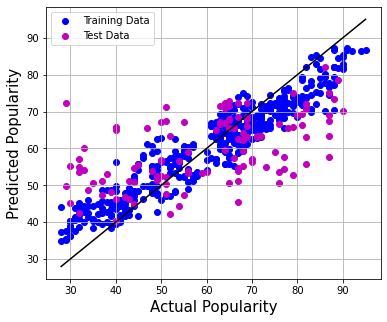

In [7]:
def compute_mse(X, y):
    scores_mse = cross_val_score(best_mdl, 
                                 X, y.ravel(), 
                                 cv=5, 
                                 scoring='neg_mean_squared_error')
    return -np.mean(scores_mse)

def compute_r2(X, y):
    scores_r2 = cross_val_score(best_mdl, 
                                X, y.ravel(), 
                                cv=5, 
                                scoring='r2')
    return np.mean(scores_r2)


best_mdl.fit(X_train, y_train_scaled.ravel())    

print("  Best cross-validation score (R2) : %.5f" % compute_r2(X_train, y_train_scaled))
print("  Best cross-validation score (MSE): %.5f" % compute_mse(X_train, y_train_scaled))
y_train_pred = best_mdl.predict(X_train) 
R2_train = r2_score(y_train_scaled,y_train_pred.ravel())
print("  Performance on train data (R2) :  %.5f" % R2_train)
mse_train = mean_squared_error(y_train_scaled,y_train_pred)
print("  Performance on train data (MSE):  %.5f" % mse_train)
y_test_pred = best_mdl.predict(X_test)
R2_test = r2_score(y_test_scaled,y_test_pred.ravel())
print("  Performance on test data (R2)  :  %.5f" % R2_test)
mse_test = mean_squared_error(y_test_scaled,y_test_pred)
print("  Performance on test data (MSE) :  %.5f" % mse_test)

X = np.vstack((X_train, X_test))
y = np.vstack((y_train_scaled, y_test_scaled))
y_pred = best_mdl.predict(X)
R2_all = r2_score(y, y_pred)
print("  Performance on all data (R2)   :  %.5f" % R2_all)
mse_all = mean_squared_error(y, y_pred)
print("  Performance on all data (MSE)  :  %.5f" % mse_all)

y_train_pred = scalerY.inverse_transform(y_train_pred.reshape(-1,1))
y_test_pred = scalerY.inverse_transform(y_test_pred.reshape(-1,1))

y_lim = np.vstack((y_train, y_test, 
                   y_train_pred.reshape(-1,1), 
                   y_test_pred.reshape(-1,1)))
plt.figure(figsize=(6,5))
plt.plot(np.array([np.min(y_lim), np.max(y_lim)]),
         np.array([np.min(y_lim), np.max(y_lim)]), 'k')
plt.scatter(y_train, y_train_pred, color='b', label='Training Data')
plt.scatter(y_test, y_test_pred, color='m', label='Test Data')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.legend()
plt.grid()
plt.show()

## Perform explainability analysis
First, try using Kernel Explainer

Using 461 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
Exact explainer: 462it [02:47,  2.76it/s]                                                                                   


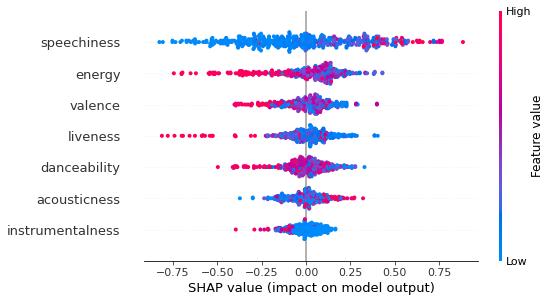

In [8]:
import shap

shap_values = shap.KernelExplainer(best_mdl.predict, X_train)
background = shap.maskers.Independent(X_train, max_samples=500)
explainer = shap.Explainer(best_mdl.predict, background)
shap_values = explainer(X_train)

# Plot the feature importance using SHAP
shap.summary_plot(shap_values, X_train, feature_names=TS.columns.values[np.r_[7:12, 13, 15]])

Now, let's try using Tree Explainer

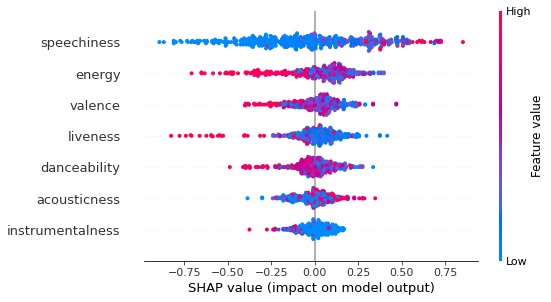

In [9]:
explainer = shap.TreeExplainer(best_mdl)
shap_values2 = explainer.shap_values(X_train)
shap.summary_plot(shap_values2, X_train, feature_names=TS.columns.values[np.r_[7:12, 13, 15]])